In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [3]:
data=pd.read_csv('/content/train_loan.csv')

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
data.shape

(614, 13)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#1. Missing Value Handling

In [9]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [12]:
data['Gender']=data['Gender'].fillna("Female")

In [13]:
data['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [14]:
data['Married']=data['Married'].fillna("No")

In [15]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [16]:
data['Dependents']=data['Dependents'].fillna("1")

In [17]:
data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [18]:
data['Self_Employed']=data['Self_Employed'].fillna("Yes")

In [19]:
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mean())

In [20]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#2. Outlier Detection

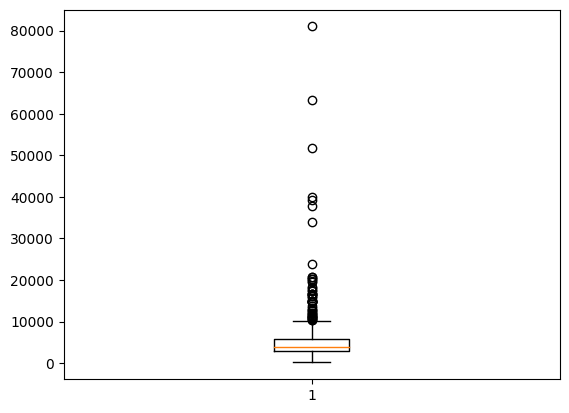

In [21]:
plt.boxplot(data['ApplicantIncome'])
plt.show()

In [22]:
Q1 = data['ApplicantIncome'].quantile(0.25)
Q2 = data['ApplicantIncome'].quantile(0.5)
Q3 = data['ApplicantIncome'].quantile(0.75)
IQR=Q3-Q1
upper=Q3+(1.5*IQR)
lower=Q1-(1.5*IQR)

In [23]:
print(upper,lower)

10171.25 -1498.75


In [43]:
data[(data['ApplicantIncome']<lower)| (data['ApplicantIncome']>upper)].index

Int64Index([  0,   4,   9,  20,  21,  25,  34,  47,  54,  58,
            ...
            580, 591, 592, 594, 596, 598, 599, 604, 611, 612],
           dtype='int64', length=157)

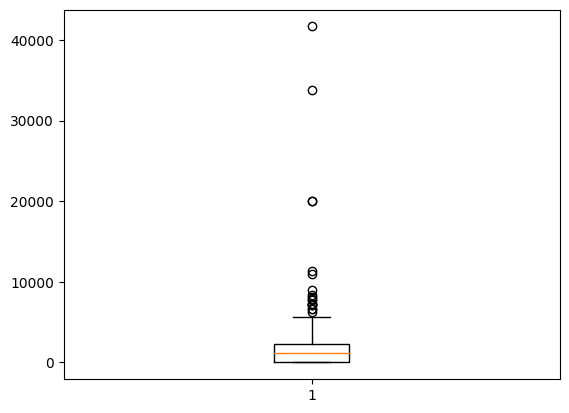

In [24]:
plt.boxplot(data['CoapplicantIncome'])
plt.show()

In [40]:
Q1 = data['CoapplicantIncome'].quantile(0.25)
Q2 = data['CoapplicantIncome'].quantile(0.5)
Q3 = data['CoapplicantIncome'].quantile(0.75)
IQR=Q3-Q1
upper=Q3+(1.5*IQR)
lower=Q1-(1.5*IQR)

In [41]:
print(upper,lower)

5743.125 -3445.875


In [42]:
data[(data['CoapplicantIncome']<lower)| (data['CoapplicantIncome']>upper)].index

Int64Index([  9,  12,  38, 122, 135, 177, 180, 253, 349, 372, 402, 417, 444,
            506, 513, 523, 581, 600],
           dtype='int64')

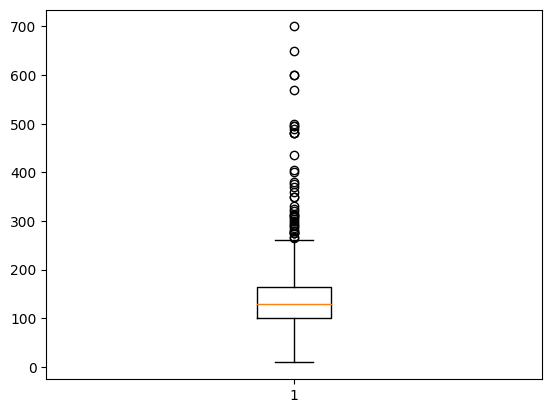

In [25]:
plt.boxplot(data['LoanAmount'])
plt.show()

In [37]:
Q1 = data['LoanAmount'].quantile(0.25)
Q2 = data['LoanAmount'].quantile(0.5)
Q3 = data['LoanAmount'].quantile(0.75)
IQR=Q3-Q1
upper=Q3+(1.5*IQR)
lower=Q1-(1.5*IQR)

In [38]:
print(upper,lower)

261.5 3.5


In [39]:
data[(data['LoanAmount']<lower)| (data['LoanAmount']>upper)].index

Int64Index([  5,   9,  21,  34,  54,  67,  83, 126, 130, 135, 155, 161, 171,
            177, 233, 253, 258, 260, 278, 308, 324, 325, 333, 351, 369, 372,
            381, 391, 409, 432, 487, 506, 514, 523, 525, 536, 561, 572, 592,
            600, 604],
           dtype='int64')

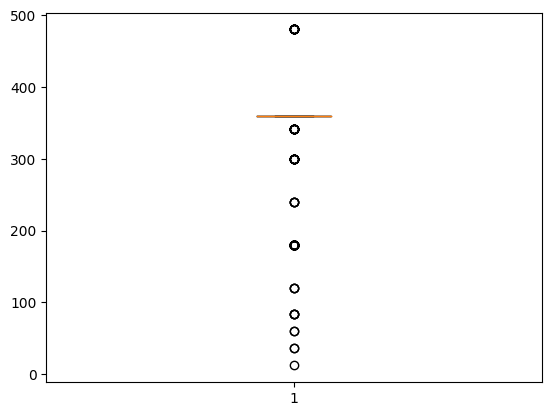

In [26]:
plt.boxplot(data['Loan_Amount_Term'])
plt.show()

In [34]:
Q1 = data['Loan_Amount_Term'].quantile(0.25)
Q2 = data['Loan_Amount_Term'].quantile(0.5)
Q3 = data['Loan_Amount_Term'].quantile(0.75)
IQR=Q3-Q1
upper=Q3+(1.5*IQR)
lower=Q1-(1.5*IQR)

In [35]:
print(upper,lower)

360.0 360.0


In [36]:
data[(data['Loan_Amount_Term']<lower)| (data['Loan_Amount_Term']>upper)].index

Int64Index([ 14,  16,  19,  36,  44,  45,  62,  66,  68,  72,
            ...
            554, 573, 575, 585, 590, 591, 593, 600, 605, 610],
           dtype='int64', length=102)

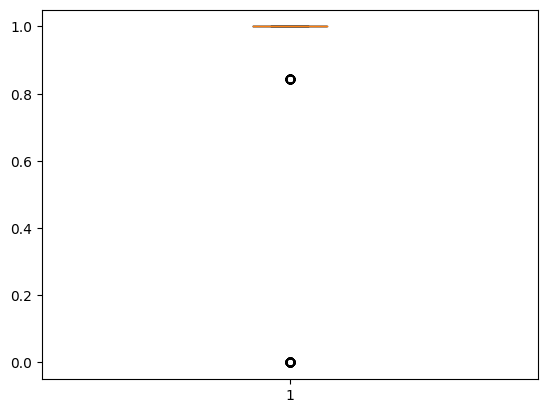

In [27]:
plt.boxplot(data['Credit_History'])
plt.show()

In [30]:
Q1 = data['Credit_History'].quantile(0.25)
Q2 = data['Credit_History'].quantile(0.5)
Q3 = data['Credit_History'].quantile(0.75)
IQR=Q3-Q1
upper=Q3+(1.5*IQR)
lower=Q1-(1.5*IQR)

In [31]:
print(upper,lower)

1.0 1.0


In [33]:
data[(data['Credit_History']<lower)| (data['Credit_History']>upper)].index

Int64Index([  7,  16,  17,  20,  22,  23,  24,  30,  36,  42,
            ...
            567, 569, 571, 576, 583, 584, 589, 597, 600, 613],
           dtype='int64', length=139)

#3. Encoding

#3.a Label Encoding

In [44]:
data['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [45]:
le = LabelEncoder()

In [46]:
data['Self_Employed']=le.fit_transform(data['Self_Employed'])

In [47]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,0,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,0,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,1,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,0,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,0,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [48]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

#3.b One hot Encoding

In [49]:
data=pd.get_dummies(data)

In [50]:
data.head()

,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
1,0,4583,1508.0,128.000000,360.0,1.0,0,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,1,3000,0.0,66.000000,360.0,1.0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1
3,0,2583,2358.0,120.000000,360.0,1.0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,1
4,0,6000,0.0,141.000000,360.0,1.0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1


In [51]:
data.dtypes

Self_Employed                int64
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
                            ...   
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
Loan_Status_N                uint8
Loan_Status_Y                uint8
Length: 635, dtype: object

#4.Scaling

In [52]:
sc=StandardScaler()

In [53]:
data.loc[:,['Loan_Amount_Term','Credit_History']]=sc.fit_transform(data[['Loan_Amount_Term','Credit_History']])

In [54]:
data.describe()

,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
count,614.000000,614.000000,614.000000,614.000000,6.140000e+02,6.140000e+02,614.000000,614.000000,614.000000,614.000000,...,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.185668,5403.459283,1621.245798,146.412162,3.905671e-17,2.488057e-16,0.001629,0.001629,0.001629,0.001629,...,0.190554,0.164495,0.083062,0.781759,0.218241,0.291531,0.379479,0.328990,0.312704,0.687296
std,0.389155,6109.041673,2926.248369,84.037468,1.000815e+00,1.000815e+00,0.040357,0.040357,0.040357,0.040357,...,0.393058,0.371027,0.276201,0.413389,0.413389,0.454838,0.485653,0.470229,0.463973,0.463973
min,0.000000,150.000000,0.000000,9.000000,-5.130593e+00,-2.410441e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.250000,2.798505e-01,4.516405e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3812.500000,1188.500000,129.000000,2.798505e-01,4.516405e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,5795.000000,2297.250000,164.750000,2.798505e-01,4.516405e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,81000.000000,41667.000000,700.000000,2.145521e+00,4.516405e-01,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
data.head()

,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,0,5849,0.0,146.412162,0.279851,0.45164,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
1,0,4583,1508.0,128.000000,0.279851,0.45164,0,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,1,3000,0.0,66.000000,0.279851,0.45164,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1
3,0,2583,2358.0,120.000000,0.279851,0.45164,0,0,0,1,...,0,0,0,0,1,0,0,1,0,1
4,0,6000,0.0,141.000000,0.279851,0.45164,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
